## ¿Cómo trabajar con los resultados de segmentación?

In [1]:
# Cargar las librerías necesarias
import numpy as np
import matplotlib.pyplot as plt

from skimage.color import rgb2gray
from skimage import data
from skimage.filters import gaussian
from skimage.segmentation import (active_contour, felzenszwalb, quickshift,
                                 mark_boundaries, slic, clear_border)

import io

In [2]:
# Defino una función para mostrar una imagen por pantalla con el criterio que considero más acertado
def imshow(img):
    fig, ax = plt.subplots(figsize=(7, 7))
    # El comando que realmente muestra la imagen
    ax.imshow(img,cmap=plt.cm.gray)
    # Para evitar que aparezcan los números en los ejes
    ax.set_xticks([]), ax.set_yticks([])
    plt.show()

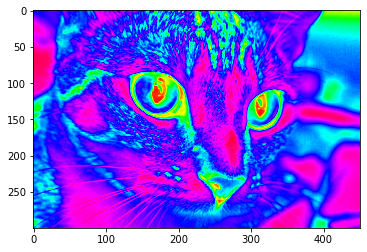

In [11]:
# Leo la imagen chelsea (es un gato)
chelsea = data.chelsea()

plt.imshow(chelsea[:,:,0],cmap = 'hsv')
#el tercer numero puede ser 0 (R), 1 (G) o 2 (B)

In [12]:
chelsea.shape
#tamaño de la matriz

(300, 451, 3)

In [17]:
chelsea[3,3,2]
#para seleccionar un punto

112

<ipython-input-24-bd489257d562>:1: FutureWarning: skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.
  chelsea_seg = slic(chelsea, n_segments=10)
<ipython-input-24-bd489257d562>:2: FutureWarning: skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.
  plt.imshow(slic(data.coffee(),n_segments=100),cmap='jet') #


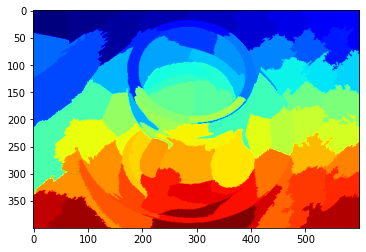

In [24]:
chelsea_seg = slic(chelsea, n_segments=10)
plt.imshow(slic(data.coffee(),n_segments=100),cmap='jet') #

In [25]:
chelsea_seg

array([[0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1],
       ...,
       [0, 0, 0, ..., 3, 3, 3],
       [0, 0, 0, ..., 3, 3, 3],
       [0, 0, 0, ..., 3, 3, 3]], dtype=int64)

<ipython-input-26-b6ab82b2e090>:1: FutureWarning: skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.
  imshow(mark_boundaries(data.coffee(),slic(data.coffee(),n_segments=10)))


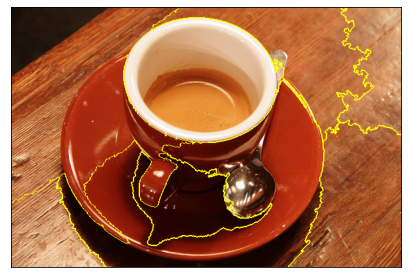

In [26]:
imshow(mark_boundaries(data.coffee(),slic(data.coffee(),n_segments=10)))

<ipython-input-27-8cc990397b5e>:2: FutureWarning: skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.
  slic(data.coffee(),


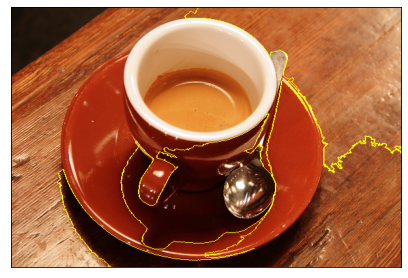

In [27]:
imshow(mark_boundaries(data.coffee(),
                       slic(data.coffee(),
                            n_segments=5)))

## Otros tipos de segmentación

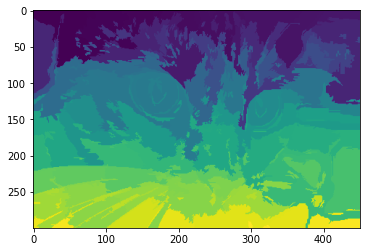

In [28]:
segmentationChelsea = felzenszwalb(chelsea,multichannel=True, scale = 300, sigma = 0.2)
plt.imshow(segmentationChelsea)

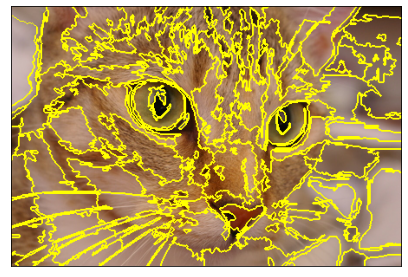

In [29]:
imshow(mark_boundaries(chelsea,
                       segmentationChelsea))

## Agregación multiescala

In [30]:
from skimage import data, io, segmentation, color
from skimage.future import graph
import numpy as np

In [31]:
img = data.coffee()
labels = segmentation.slic(img, compactness=30, n_segments=400)
g = graph.rag_mean_color(img, labels)

<ipython-input-31-d56945dbaebb>:2: FutureWarning: skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.
  labels = segmentation.slic(img, compactness=30, n_segments=400)


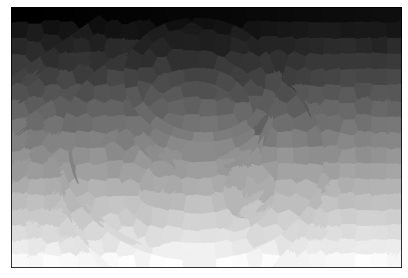

In [32]:
imshow(labels)

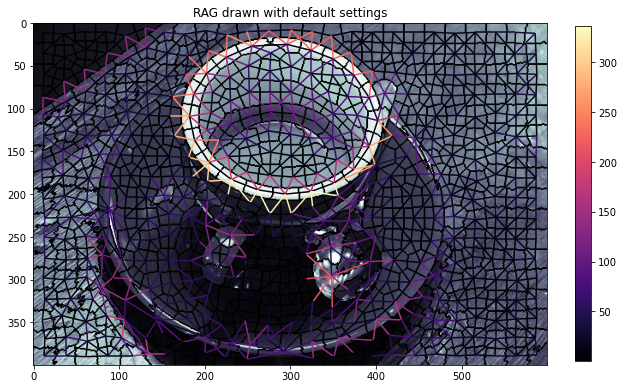

In [33]:
fig, ax = plt.subplots(nrows=1, sharex=True, sharey=True, figsize=(10, 15))

ax.set_title('RAG drawn with default settings')
lc = graph.show_rag(labels, g, img, ax=ax)
# specify the fraction of the plot area that will be used to draw the colorbar
fig.colorbar(lc, fraction=0.03, ax=ax)